In [1]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

In [2]:
parameters = {
    'n_estimators': [10, 20, 30],
    'max_depth': [2, 5, 7, 10]
}

```Python
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_
```

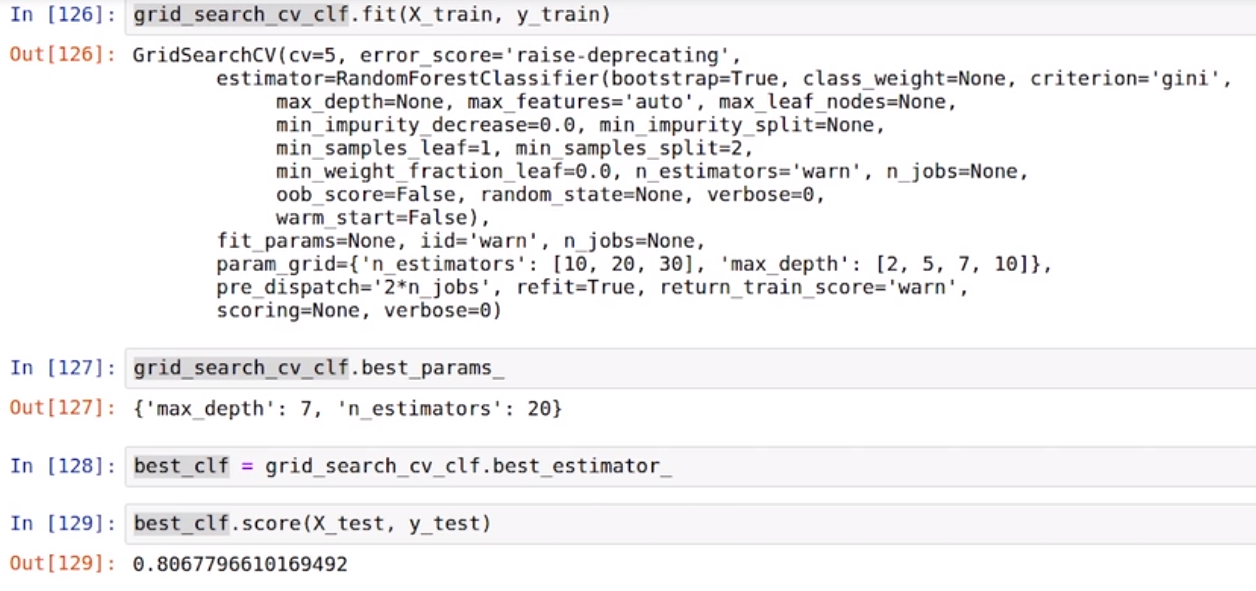

# Best features
```Python
best_clf = grid_search_cv_clf.best_estimator_
best_clf.feature_importances_
```

```Python
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                      'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)
```

# Task 1

Warm-up task - create a RandomForestClassifier model with 15 trees and a maximum depth of 5 levels, place it in the rf variable. Train the model on the x_train and y_train data, predict the class for the observations in x_test and put it in the predictions variable.

```Python
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
```

# Task 2

Let's use data on heart disease and train Random Forest on it. Build a graph of the importance of variables for classification and select the most similar one among the proposed options.

The task contains randomness, run random forest training and plotting several times,
to see changes in the importance of features (the 5 most important ones are usually present in the top, just in a different order).
To get the same graph as in the correct answer, do
```Python
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
```

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [4]:
np.random.seed(0)
rf = RandomForestClassifier(n_estimators=10, max_depth=5)

In [6]:
heart = pd.read_csv('heart-disease.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
X = heart.drop('target', axis=1)
y = heart.target

In [8]:
# Figure out feature importances
rf.fit(X, y)
rf.feature_importances_

array([0.04344095, 0.0399895 , 0.1399832 , 0.0535693 , 0.05688662,
       0.00849278, 0.01858343, 0.12954976, 0.04807909, 0.11664461,
       0.06920762, 0.07704782, 0.19852531])

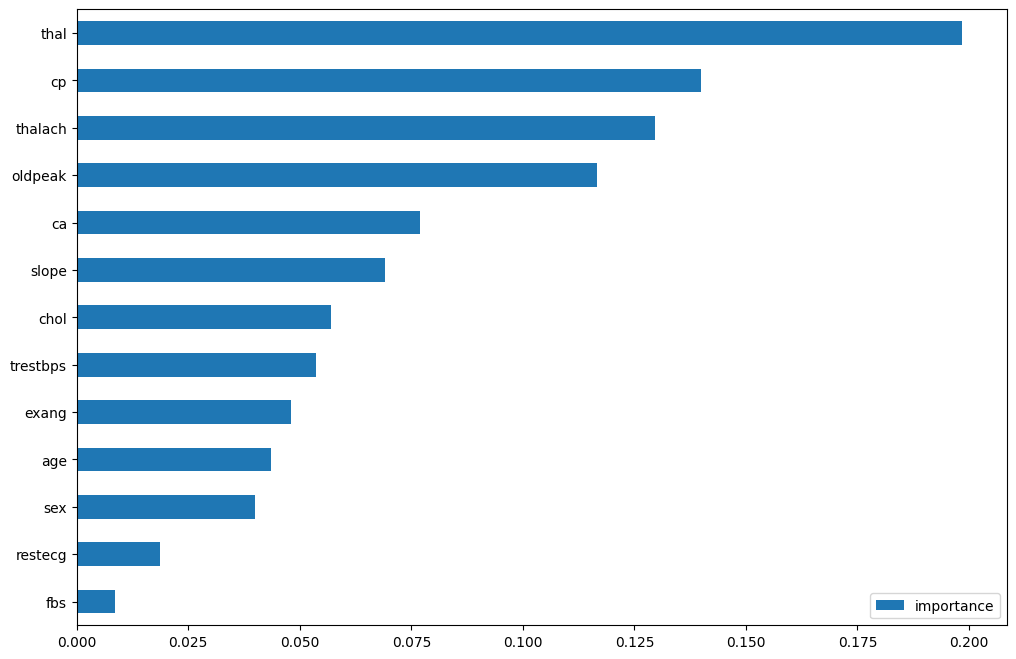

In [10]:
# Draw feature importances
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));